In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

In [2]:
# Definitions

# Directorio de imagenes
dir_img = './../imagenes/P2_5'

# Data files
data_file = './../data/P3_2_5.txt'
old_data_file = './../data/P3_2_4.txt'

In [3]:
# Creamos el directorio de imagenes
if not os.path.exists(dir_img):
	os.mkdir(dir_img)
else :
	os.system("rm -r " + dir_img)
	os.mkdir(dir_img)

In [4]:
# Get lines from data files
file = open(data_file, 'r')

# Read data in blocks of 6 lines
blocks = []

for i, line in enumerate(file):
	if i % 4 == 0:
		blocks.append([])
	blocks[-1].append(line)

# Close file
file.close()

# Get lines from data files
file = open(old_data_file, 'r')

# Read data in blocks of 6 lines
blocks_2 = []

for i, line in enumerate(file):
	if i % 6 == 0:
		blocks_2.append([])
	blocks_2[-1].append(line)

# Close file
file.close()


In [5]:
# Review blocks to get the desired data
row_data = []
row_data_2 = []

for block in blocks:

	splited_1 = block[0].split()
	splited_2 = block[1].split()
	splited_3 = block[2].split()
	splited_4 = block[3].split()

	elements = splited_1[4]
	blocks = splited_1[9]
	threads = splited_1[-2]
	repts = splited_3[4]
	time_host = splited_3[-2]
	time_alloc = splited_2[-2]
	time_dev = splited_4[-2]

	row_data.append({
		'elements': elements,
		'blocks': blocks,
		'threads': threads,
		'repts': repts,
		'time_host': time_host,
		'time_alloc': time_alloc,
		'time_dev': time_dev
	})

for block in blocks_2:

	splited_1 = block[0].split()
	splited_2 = block[1].split()
	splited_3 = block[2].split()
	splited_4 = block[3].split()
	splited_5 = block[4].split()
	splited_6 = block[5].split()

	elements = splited_1[4]
	blocks = splited_1[9]
	threads = splited_1[-2]
	repts = splited_2[4]
	time_host = splited_2[-2]
	time_dev_malloc = splited_3[-2]
	time_host_to_dev = splited_4[-2]
	time_dev_kernel = splited_5[-2]
	time_dev_to_host = splited_6[-2]

	row_data_2.append({
		'elements': elements,
		'blocks': blocks,
		'threads': threads,
		'repts': repts,
		'time_host': time_host,					# MS
		'time_dev_malloc': time_dev_malloc,		# MS
		'time_host_to_dev': time_host_to_dev,	# MS
		'time_dev_kernel': time_dev_kernel,		# MS
		'time_dev_to_host': time_dev_to_host	# MS
	})



In [6]:
# Convert row data to pandas DataFrame
df = pd.DataFrame(row_data)
df_2 = pd.DataFrame(row_data_2)

# Convert columns to numeric
df['elements'] = pd.to_numeric(df['elements'])
df['blocks'] = pd.to_numeric(df['blocks'])
df['threads'] = pd.to_numeric(df['threads'])
df['repts'] = pd.to_numeric(df['repts'])
df['time_host'] = pd.to_numeric(df['time_host'])
df['time_alloc'] = pd.to_numeric(df['time_alloc'])
df['time_dev'] = pd.to_numeric(df['time_dev'])

df_2['elements'] = pd.to_numeric(df_2['elements'])
df_2['blocks'] = pd.to_numeric(df_2['blocks'])
df_2['threads'] = pd.to_numeric(df_2['threads'])
df_2['repts'] = pd.to_numeric(df_2['repts'])
df_2['time_host'] = pd.to_numeric(df_2['time_host'])
df_2['time_dev_malloc'] = pd.to_numeric(df_2['time_dev_malloc'])
df_2['time_host_to_dev'] = pd.to_numeric(df_2['time_host_to_dev'])
df_2['time_dev_kernel'] = pd.to_numeric(df_2['time_dev_kernel'])
df_2['time_dev_to_host'] = pd.to_numeric(df_2['time_dev_to_host'])

df_2['time_dev'] = df_2['time_dev_malloc'] + df_2['time_host_to_dev'] + df_2['time_dev_kernel'] + df_2['time_dev_to_host']

# Limit 2 decimal places
df = df.round(2)
df_2 = df_2.round(2)

In [7]:
# Make both dataframes have the same elements
df_2 = df_2[df_2['elements'].isin(df['elements'])]

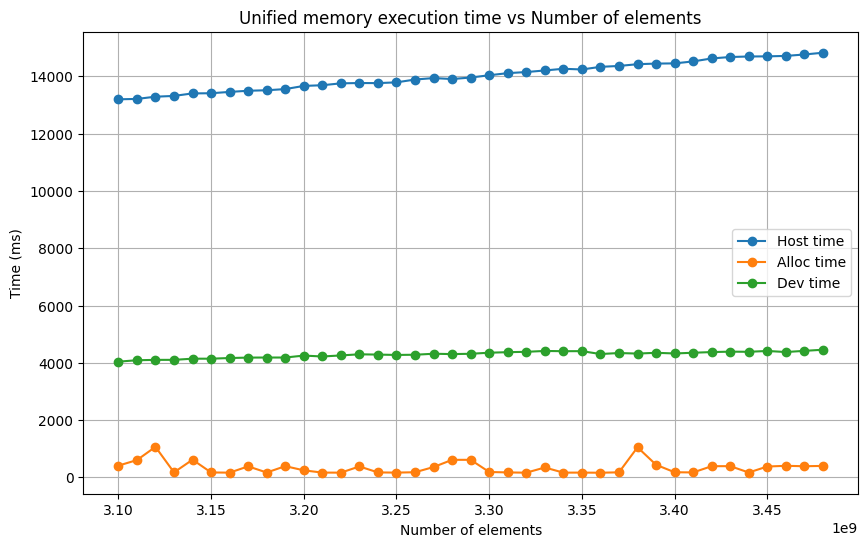

In [8]:
# Plot data

x_values = df['elements']
y_values_1 = df['time_host']
y_values_2 = df['time_alloc']
y_values_3 = df['time_dev']

plt.figure(figsize=(10, 6))

plt.plot(x_values, y_values_1, label='Host time', marker='o')
plt.plot(x_values, y_values_2, label='Alloc time', marker='o')
plt.plot(x_values, y_values_3, label='Dev time', marker='o')

plt.xlabel('Number of elements')
plt.ylabel('Time (ms)')

plt.title('Unified memory execution time vs Number of elements')
plt.legend()
plt.grid()

plt.savefig(dir_img + '/time_vs_elements.png')

plt.show()

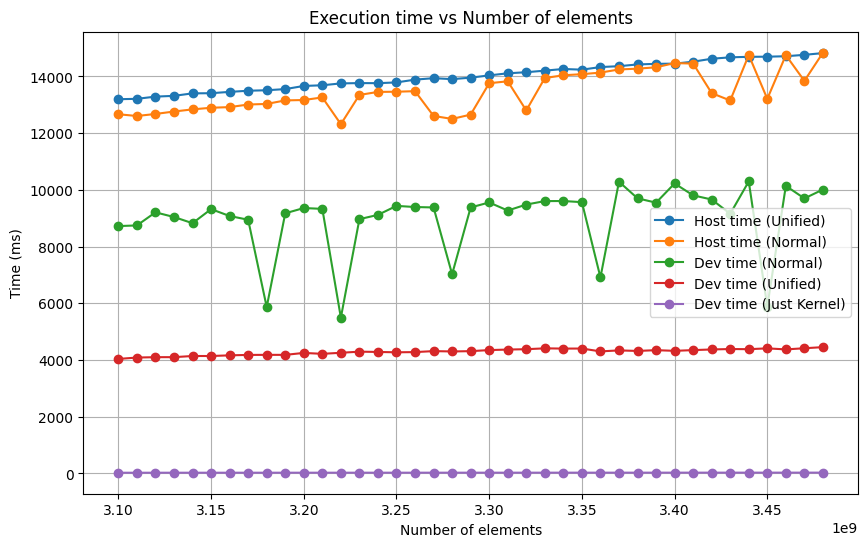

In [9]:
# df host vs df_2 host
x_values = df['elements']

y_values_1 = df['time_host']
y_values_2 = df_2['time_host']
y_values_3 = df_2['time_dev']
y_values_4 = df['time_dev']
y_values_5 = df_2['time_dev_kernel']

plt.figure(figsize=(10, 6))

plt.plot(x_values, y_values_1, label='Host time (Unified)', marker='o')
plt.plot(x_values, y_values_2, label='Host time (Normal)', marker='o')
plt.plot(x_values, y_values_3, label='Dev time (Normal)', marker='o')
plt.plot(x_values, y_values_4, label='Dev time (Unified)', marker='o')
plt.plot(x_values, y_values_5, label='Dev time (Just Kernel)', marker='o')

plt.xlabel('Number of elements')
plt.ylabel('Time (ms)')

plt.title('Execution time vs Number of elements')
plt.legend()
plt.grid()

plt.savefig(dir_img + '/time_vs_elements_host.png')

plt.show()